Duvall Pinkney green taxi homework assignment

# Homework 2: slicing, sorting, and grouping

This homework uses the 2020 green taxi trip data filtered to only be trips with a pickup date and time on Feb. 4, 2020.  Download the file from Blackboard or from GitHub:
[https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv).  

The original unfiltered dataset is available at [https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data-January-June-/pkmi-4kfn](https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data-January-June-/pkmi-4kfn).

Answer the following questions for the data, showing all outputs of your code in the notebook. 

All plots should have an appropriate title and axis labels.

### Question 0:  Load the data

Put any import statements, and load the green taxi trip data from Feb. 4, 202 from the CSV file or URL here.  The column `lpep_pickup_datetime` should be stored as a DateTime object.

Note:  To convert the `lpep_pickup_datetime` column to a `datetime` object, you may have to add the parameter `parse_dates = ["lpep_pickup_datetime"]` to `read_csv()`.  
ex. `taxi = pd.read_csv("taxi.csv", parse_dates = ["lpep_pickup_datetime"])` instead of using the method presented in the labs.  I am honestly not sure why.




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
taxi = pd.read_csv("Feb4_2020_Green_Taxi_Trip_Data.csv")
taxi

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,02/04/2020 12:00:07 AM,02/04/2020 12:08:01 AM,N,1.0,42,152,1.0,1.21,7.00,0.50,0.5,0.00,0.0,NaN,0.3,8.30,1.0,1.0,0.0
1,2.0,02/04/2020 12:00:20 AM,02/04/2020 12:13:44 AM,N,1.0,25,188,1.0,3.28,12.50,0.50,0.5,0.00,0.0,NaN,0.3,13.80,2.0,1.0,0.0
2,2.0,02/04/2020 12:00:42 AM,02/04/2020 12:03:29 AM,N,1.0,166,152,1.0,0.68,4.00,0.50,0.5,0.00,0.0,NaN,0.3,5.30,2.0,1.0,0.0
3,2.0,02/04/2020 12:01:00 AM,02/04/2020 12:13:15 AM,N,1.0,82,173,1.0,1.89,9.50,0.50,0.5,1.50,0.0,NaN,0.3,12.30,1.0,1.0,0.0
4,NaN,02/04/2020 12:01:00 AM,02/04/2020 12:31:00 AM,NaN,NaN,136,90,NaN,12.80,51.55,2.75,0.0,0.00,0.0,NaN,0.3,54.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13976,2.0,02/04/2020 11:57:53 PM,02/05/2020 12:01:00 AM,N,1.0,112,255,1.0,0.64,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
13977,2.0,02/04/2020 11:58:14 PM,02/05/2020 12:09:00 AM,N,1.0,97,52,1.0,1.77,9.00,0.50,0.5,0.00,0.0,NaN,0.3,10.30,1.0,1.0,0.0
13978,2.0,02/04/2020 11:58:29 PM,02/05/2020 12:05:29 AM,N,1.0,25,181,1.0,1.80,7.50,0.50,0.5,2.64,0.0,NaN,0.3,11.44,1.0,1.0,0.0
13979,2.0,02/04/2020 11:59:37 PM,02/05/2020 12:02:39 AM,N,1.0,7,7,1.0,0.69,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0


### Question 1

Create a new dataframe called `taxi2` containing only the columns `lpep_pickup_datetime`, `passenger_count`, `trip_distance`, and `total_amount`.

In [6]:
taxi2 = taxi[["lpep_pickup_datetime", "passenger_count", "trip_distance", "total_amount"]]
taxi2

,lpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,02/04/2020 12:00:07 AM,1.0,1.21,8.30
1,02/04/2020 12:00:20 AM,1.0,3.28,13.80
2,02/04/2020 12:00:42 AM,1.0,0.68,5.30
3,02/04/2020 12:01:00 AM,1.0,1.89,12.30
4,02/04/2020 12:01:00 AM,NaN,12.80,54.60
...,...,...,...,...
13976,02/04/2020 11:57:53 PM,1.0,0.64,5.80
13977,02/04/2020 11:58:14 PM,1.0,1.77,10.30
13978,02/04/2020 11:58:29 PM,1.0,1.80,11.44
13979,02/04/2020 11:59:37 PM,1.0,0.69,5.80


### Question 2

Find the row with the longest trip distance and then use slicing to extract just that row.

When did the trip take place and how much did it cost?

Hint:  Use `idxmax()` to find the row index of the longest trip distance.

In [11]:
long_trip_filter = taxi2["trip_distance"].idxmax()
long_trip_filter


9629

### Question 3

Create a new DataFrame called `sorted_taxi` that is sorted in ascending order by passenger count, then by trip distance.

What do you notice about the `passenger_count` column at the beginning and end of this new DataFrame?  

In [12]:
sorted_taxi = taxi2.sort_values("trip_distance")
sorted_taxi

#passenger count is sorted by the lowest trip distances to the longest trip in ascending order

,lpep_pickup_datetime,passenger_count,trip_distance,total_amount
3109,02/04/2020 09:50:16 AM,1.0,0.00,12.00
4719,02/04/2020 11:42:00 AM,NaN,0.00,24.42
2767,02/04/2020 09:27:38 AM,1.0,0.00,21.00
12012,02/04/2020 08:08:38 PM,8.0,0.00,10.30
2770,02/04/2020 09:27:51 AM,1.0,0.00,21.00
...,...,...,...,...
7708,02/04/2020 03:29:00 PM,NaN,31.69,81.00
3298,02/04/2020 10:02:42 AM,1.0,32.04,92.42
5591,02/04/2020 12:52:54 PM,1.0,32.35,99.04
3815,02/04/2020 10:36:08 AM,1.0,32.51,93.80


### Question 4

Compute the mean trip distance for each possible number of passengers.  For what number of passengers is the mean trip distance the longest?

In [13]:
mean_trip_distance = sorted_taxi.mean()
mean_trip_distance

passenger_count     1.318208
trip_distance       3.534381
total_amount       19.385440
dtype: float64

### Question 5

Compute the median trip distance for each hour (0-23) of Feb. 4, 2020, and plot a line graph of these medians.

What trends do you notice in the graph?

The hour of DateTime data can be accessed with `dt.hour`  

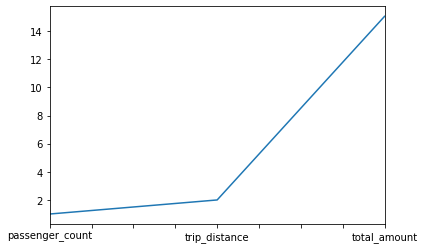

In [16]:
median_trip_distance = sorted_taxi.median()
median_trip_distance.plot(kind= 'line')